In [128]:
import pandas as pd
import numpy as np

#Import Data
data = pd.read_csv('SampleData.csv')

# Create Pivot
AST = pd.pivot_table(data, 
                    values=['MTD', '3M', '6M', 'YTD'], 
                    index=['strategy_classification'], 
                    aggfunc=np.mean
                    )

#Sort Alphabetically by strategy_classification
AST['labels'] = AST.index.str.lower()
AST = AST.sort_values('labels').drop('labels', axis=1)

# If you wanted to add in a new column with a numeric index then you would not drop the column above, and include this:
#AST.index = [i for i in range(len(AST.index))]

#Re-order Columns
AST = AST[['MTD', '3M', '6M', 'YTD']]

# Change formatting of numbers into Percentage (Just by changing display)
AST.style.format({
    'MTD': '{:,.2%}'.format,
    '3M': '{:,.2%}'.format,
    '6M': '{:,.2%}'.format,
    'YTD': '{:,.2%}'.format
})

AST2

,MTD,YTD
strategy_classification,,
Commodity,0.002946,0.010080
CTA,0.002445,-0.018021
Equity Market Neutral,0.001545,-0.008119
Fixed Income,0.008062,0.023878
Quant Macro,0.003969,-0.010359
Volatility,-0.001244,-0.008836


In [92]:
## Create Data for All Strats Table

import pandas as pd
import numpy as np

#Import Data
data = pd.read_csv('SampleData.csv')

# Create Pivot
AST = pd.pivot_table(data, 
                    values=['MTD', '3M', '6M', 'YTD'], 
                    index=['strategy_classification'], 
                    aggfunc=np.mean
                    )

#Sort Alphabetically by strategy_classification
AST['labels'] = AST.index.str.lower()
AST = AST.sort_values('labels').drop('labels', axis=1)

# If you wanted to add in a new column with a numeric index then you would not drop the column above, and include this:
#AST.index = [i for i in range(len(AST.index))]

#Re-order Columns
AST = AST[['MTD', '3M', '6M', 'YTD']]

#Convert numbers into percentage (by actually converting the data type)
AST['MTD'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['MTD']], index = AST.index)
AST['3M'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['3M']], index = AST.index)
AST['6M'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['6M']], index = AST.index)
AST['YTD'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['YTD']], index = AST.index)

AST







,MTD,3M,6M,YTD
strategy_classification,,,,
Commodity,0.29%,0.76%,-2.17%,1.01%
CTA,0.24%,-0.52%,0.01%,-1.80%
Equity Market Neutral,0.15%,-0.45%,0.08%,-0.81%
Fixed Income,0.81%,-0.02%,-0.07%,2.39%
Quant Macro,0.40%,-0.40%,0.33%,-1.04%
Volatility,-0.12%,0.51%,-2.81%,-0.88%


In [133]:
## Calculate Data for Candlestick Chart


import pandas as pd
import numpy as np

#Import Data
data = pd.read_csv('SampleData.csv')

def fiftiethPercentile(x):
    return np.percentile(x, 50)

def lowerQuartile(x):
    return np.percentile(x, 25)

def upperQuartile(x):
    return np.percentile(x, 75)

# Create Pivot
AST = pd.pivot_table(data, 
                    values=['MTD'], 
                    index=['strategy_classification'], 
                    aggfunc=[np.mean, np.max, np.min, fiftiethPercentile, lowerQuartile, upperQuartile]
                    )

#Sort Alphabetically by strategy_classification
AST['Labels'] = AST.index.str.lower()
AST = AST.sort_values('Labels')
#.drop('labels', axis=1)

AST.index = [i for i in range(len(AST.index))]

# Rename columns
AST.columns = ['Mean', 'Max', 'Min', 'Median', 'Lower Quartile', 'Upper Quartile', 'Labels']
AST = AST[['Labels', 'Mean', 'Max', 'Min', 'Median', 'Lower Quartile', 'Upper Quartile']]

#Convert numbers into percentage (by actually converting the data type)
AST['Mean'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Mean']], index = AST.index)
AST['Max'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Max']], index = AST.index)
AST['Min'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Min']], index = AST.index)
AST['Median'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Median']], index = AST.index)
AST['Lower Quartile'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Lower Quartile']], index = AST.index)
AST['Upper Quartile'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Upper Quartile']], index = AST.index)

AST

,Labels,Mean,Max,Min,Median,Lower Quartile,Upper Quartile
0,commodity,0.29%,4.94%,-4.88%,0.78%,-2.07%,2.77%
1,cta,0.24%,4.68%,-4.89%,0.29%,-1.97%,3.11%
2,equity market neutral,0.15%,4.99%,-4.89%,0.08%,-2.56%,3.20%
3,fixed income,0.81%,4.94%,-4.73%,1.51%,-1.90%,3.60%
4,quant macro,0.40%,4.84%,-4.94%,0.77%,-2.36%,2.81%
5,volatility,-0.12%,4.82%,-4.89%,0.41%,-3.30%,2.17%


/Users/Guest/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x116687550>,
 'caps': [<matplotlib.lines.Line2D at 0x11694fd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1169a8710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1127b0860>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1125054e0>,
  <matplotlib.lines.Line2D at 0x116c1df98>]}

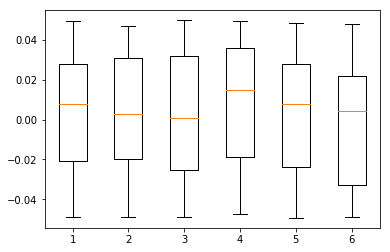

In [48]:
#Create Candlestick Chart

from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.patches import Polygon


import pandas as pd
import numpy as np

#Import Data
data = pd.read_csv('SampleData.csv')

def fiftiethPercentile(x):
    return np.percentile(x, 50)

def lowerQuartile(x):
    return np.percentile(x, 25)

def upperQuartile(x):
    return np.percentile(x, 75)

# Create Pivot
AST = pd.pivot_table(data, 
                    values=['MTD'], 
                    index=['strategy_classification'], 
                    aggfunc=[np.mean, np.max, np.min, fiftiethPercentile, lowerQuartile, upperQuartile]
                    )

#Sort Alphabetically by strategy_classification
AST['Labels'] = AST.index.str.lower()
AST = AST.sort_values('Labels')
#.drop('labels', axis=1)

AST.index = [i for i in range(len(AST.index))]

# Rename columns
AST.columns = ['Mean', 'Max', 'Min', 'Median', 'Lower Quartile', 'Upper Quartile', 'Labels']
AST = AST[['Labels', 'Mean', 'Max', 'Min', 'Median', 'Lower Quartile', 'Upper Quartile']]

#Convert numbers into percentage (by actually converting the data type)
AST['Mean'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Mean']], index = AST.index)
AST['Max'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Max']], index = AST.index)
AST['Min'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Min']], index = AST.index)
AST['Median'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Median']], index = AST.index)
AST['Lower Quartile'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Lower Quartile']], index = AST.index)
AST['Upper Quartile'] = pd.Series(["{0:.2f}%".format(val * 100) for val in AST['Upper Quartile']], index = AST.index)
AST
ohlc= AST[['Labels', 'Lower Quartile', 'Max', 'Min','Upper Quartile']]

ohlc.columns = ['Labels', 'open', 'high', 'low', 'close']
#ohlc

# fig, axs = plt.subplots()

#data = data.set_index(['strategy_classification'])

data2 = data[ data['strategy_classification'] == 'Commodity' ]['MTD']
data3 = data[ data['strategy_classification'] == 'CTA' ]['MTD']
data4 = data[ data['strategy_classification'] == 'Equity Market Neutral' ]['MTD']
data5 = data[ data['strategy_classification'] == 'Fixed Income' ]['MTD']
data6 = data[ data['strategy_classification'] == 'Quant Macro' ]['MTD']
data7 = data[ data['strategy_classification'] == 'Volatility' ]['MTD']


datachart = [data2, data3, data4, data5, data6, data7]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(datachart)